# ML for Option Data

In [25]:
import pandas as pd
from sklearn import svm
from sklearn import ensemble
import time
import random
from sklearn.cross_validation import train_test_split
import numpy as np
from numpy import log,sqrt,exp
from scipy import stats
import math
from sklearn import datasets
from sklearn.neighbors import KNeighborsRegressor
import csv
import scipy.spatial.distance as spsd
from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import GradientBoostingRegressor
import matplotlib.pyplot as plt
%matplotlib inline


def corr_dist(x,y):
    return spsd.correlation(x, y)
data=pd.read_csv('OptionData.csv')
data1=data.ix[:,[1,4,9,11,12,17]]
data1=data1.dropna()
datax=data1.ix[:,[0,1,2,3,4]]
datay=data1.ix[:,5]

test_percent=0.2
training_data, test_data, training_data_response, test_data_response = train_test_split(datax, datay, test_size=test_percent,random_state=42)

#Euclidean distance, general_knn
general_kNN = KNeighborsRegressor(n_neighbors=3, weights='distance', algorithm='auto', metric='euclidean')
general_kNN.fit(training_data, training_data_response)
predict_ge=general_kNN.predict(test_data)
#print("The predicted response for test data within general k-NN method, and Enclidean distance weights is:\n")
print(predict_ge)

#Euclidean distance, kdtree_knn
kdtree_kNN = KNeighborsRegressor(n_neighbors=3, weights='distance', algorithm='kd_tree', metric='euclidean')
kdtree_kNN.fit(training_data, training_data_response)
predict_te=kdtree_kNN.predict(test_data)
#print("The predicted response for test data within kd-tree k-NN method, and Enclidean distance weights is:\n")
print(predict_te)


#accuracy
n_predict=len(test_data_response)
MSE_ge=(1/n_predict)*(sum(pow((predict_ge-test_data_response),2)))
MSE_te=1/n_predict*sum(pow(predict_te-test_data_response,2))

#svm
svm_learning_machine_rbf=svm.SVR(kernel='rbf')
svm_learning_machine_rbf.fit(training_data,training_data_response)

svm_learning_machine_linear=svm.SVR(kernel='linear')
svm_learning_machine_linear.fit(training_data,training_data_response)

svm_predict_rbf=svm_learning_machine_rbf.predict(test_data)
svm_predict_linear=svm_learning_machine_linear.predict(test_data)

#accuracy
n_predict=len(svm_predict_rbf)
MSE_svm_rbf=1/n_predict*sum(np.power(svm_predict_rbf-test_data_response,2))
MSE_svm_linear=1/n_predict*sum(np.power(svm_predict_linear-test_data_response,2))


#Random Forest
params1={'n_estimators':20 ,'min_samples_split':2}
rf=ensemble.GradientBoostingRegressor(**params1)
rf.fit(training_data,training_data_response)
rf_predict=rf.predict(test_data)
print('random forest')
print(rf_predict)
#accuracy
n_predict=len(svm_predict_rbf)
MSE_rf=1/n_predict*sum(np.power(rf_predict-test_data_response,2))


#Gradient Boosting
params2={'n_estimators': 1000, 'max_depth':6, 'min_samples_split':2, 'learning_rate':0.01, 'loss':'ls'}
gb= ensemble.GradientBoostingRegressor(**params2)
gb.fit(training_data,training_data_response)
gb_predict=gb.predict(test_data)
print('gradient boosting')
print(gb_predict)

#accuracy
n_predict=len(svm_predict_rbf)
MSE_gb=1/n_predict*sum(np.power(gb_predict-test_data_response,2))

[ 0.22943834  0.22396378  0.23167658  0.21580175  0.20587804  0.22267315
  0.21275237  0.16947942  0.2257271   0.21270753  0.26061638  0.22855718
  0.21283093  0.21203956  0.2366294   0.22684793  0.22468719]
[ 0.22943834  0.22396378  0.23167658  0.21580175  0.20587804  0.22267315
  0.21275237  0.16947942  0.2257271   0.21270753  0.26061638  0.22855718
  0.21283093  0.21203956  0.2366294   0.22684793  0.22468719]
random forest
[ 0.22879713  0.22879713  0.22839333  0.22879713  0.17956513  0.21907705
  0.21594491  0.18344576  0.22879713  0.21594491  0.22408345  0.22879713
  0.2256427   0.22575116  0.22599838  0.2151908   0.22755241]
gradient boosting
[ 0.23510621  0.23446927  0.22240876  0.23363385  0.19355618  0.21596221
  0.20798108  0.1931804   0.22896201  0.206398    0.23841541  0.23326928
  0.23705898  0.23072278  0.23601311  0.21257347  0.21935952]


## ensemble

In [5]:
import statistics
import numpy as np

n_predict=len(svm_predict_rbf)
mse_1=MSE_ge
mse_2=MSE_te
mse_3=MSE_svm_rbf
mse_4=MSE_svm_linear
mse_5=MSE_rf
mse_6=MSE_gb


#ensemble 1
ensemble1_predict=(predict_ge+predict_te+svm_predict_rbf+svm_predict_linear+rf_predict+gb_predict)/6
print(ensemble1_predict)

#ensemble 2
ensemble2_predict=list()
for i in range(17):
    s=statistics.median([predict_ge[i],predict_te[i],svm_predict_rbf[i],+svm_predict_linear[i],+rf_predict[i],gb_predict[i]])
    ensemble2_predict.append(s)
print(ensemble2_predict)


#ensemble 3
w_1=1-mse_1/(mse_1+mse_2+mse_3+mse_4+mse_5+mse_6)
w_2=1-mse_2/(mse_1+mse_2+mse_3+mse_4+mse_5+mse_6)
w_3=1-mse_3/(mse_1+mse_2+mse_3+mse_4+mse_5+mse_6)
w_4=1-mse_4/(mse_1+mse_2+mse_3+mse_4+mse_5+mse_6)
w_5=1-mse_5/(mse_1+mse_2+mse_3+mse_4+mse_5+mse_6)
w_6=1-mse_6/(mse_1+mse_2+mse_3+mse_4+mse_5+mse_6)
ensemble3_predict=predict_ge*w_1+predict_te*w_2+svm_predict_rbf*w_3+svm_predict_linear*w_4+rf_predict*w_5+gb_predict*w_6
#print(ensemble3_predict)

#ensemble 4
w_1_new=1-w_1
w_2_new=1-w_2
w_3_new=1-w_3
w_4_new=1-w_4
w_5_new=1-w_5
w_6_new=1-w_6
ensemble4_predict=predict_ge*w_1_new+predict_te*w_2_new+svm_predict_rbf*w_3_new+svm_predict_linear*w_4_new+rf_predict*w_5_new+gb_predict*w_6_new
#print(ensemble4_predict)

[ 0.18405476  0.17394789  0.19448572  0.13784939  0.15241504  0.20295447
  0.17686019  0.17954904  0.17812336  0.17944726  0.21992856  0.18737936
  0.17305571  0.16447885  0.18279296  0.19642402  0.18455537]
[0.22911773845133435, 0.22396378415147633, 0.22539275225277802, 0.21580174664271365, 0.18391563719593143, 0.21695769457215539, 0.21042921481238488, 0.1776038758168958, 0.22572710077445313, 0.20974819560399377, 0.23125315538466978, 0.22855717818969701, 0.21283093200436534, 0.21203955797764232, 0.23093858664222705, 0.21381794849813873, 0.22257334953875585]


## Comparison peers

In [73]:
from sklearn import linear_model
training_data, test_data, training_data_response, test_data_response = train_test_split(datax, datay, test_size=test_percent,random_state=42)

training_data = np.asarray(training_data, dtype="S32")
training_data_response = np.asarray(training_data_response, dtype="S32")
lr_learning_machine=linear_model.LogisticRegression()
lr_learning_machine.fit(training_data,training_data_response)
lr_predict=lr_learning_machine.predict(test_data)
lr_predict = np.asarray(lr_predict, dtype="float64")
MSE_lr=(1/n_predict)*(sum(pow((lr_predict-test_data_response),2)))

In [86]:
MSE_ensemble1 = 1/n_predict*sum(pow(ensemble1_predict-test_data_response,2))
MSE_ensemble2 = 1/n_predict*sum(pow(ensemble2_predict-test_data_response,2))
MSE_ensemble3 = 1/n_predict*sum(pow(ensemble3_predict-test_data_response,2))
MSE_ensemble4 = 1/n_predict*sum(pow(ensemble4_predict-test_data_response,2))

[]

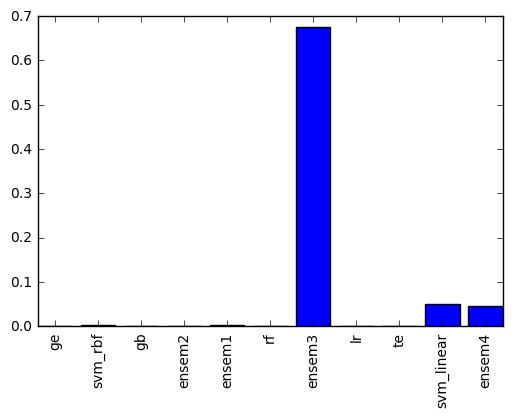

In [110]:
MSE_dict= {'ge':MSE_ge,'te':MSE_te,
'svm_rbf':MSE_svm_rbf,'svm_linear':MSE_svm_linear,
'rf':MSE_rf,
'gb':MSE_gb,
'ensem1':MSE_ensemble1,
'ensem2':MSE_ensemble2,
'ensem3':MSE_ensemble3,
'ensem4':MSE_ensemble4,
'lr':MSE_lr
}
plt.bar(range(len(MSE_dict)), MSE_dict.values(), align='center')
plt.xticks(range(len(MSE_dict)), MSE_dict.keys(),rotation = 'vertical')
plt.plot()

### Get rid of bad performance predictors

[]

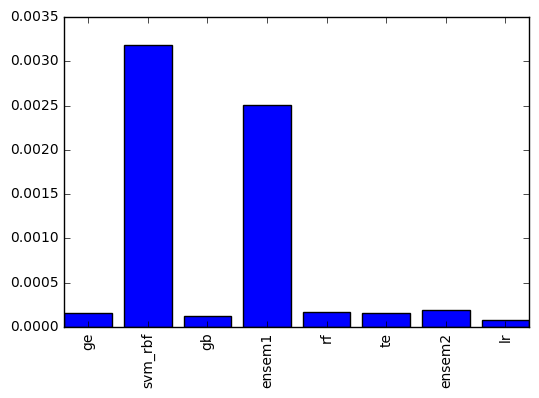

In [113]:
MSE_dict_2= {'ge':MSE_ge,'te':MSE_te,
'svm_rbf':MSE_svm_rbf,
'rf':MSE_rf,
'gb':MSE_gb,
'ensem1':MSE_ensemble1,
'ensem2':MSE_ensemble2,
'lr':MSE_lr
}
plt.bar(range(len(MSE_dict_2)), MSE_dict_2.values(), align='center')
plt.xticks(range(len(MSE_dict_2)), MSE_dict_2.keys(),rotation = 'vertical')
plt.plot()

# ML for cisc5352 Data

The predicted response for test data within general k-NN method, and Enclidean distance weights is:

[ 0.40073776  0.46576914  0.34839222  0.2893      0.42809117  0.28206574
  0.3116487   0.59783285  0.24548884  0.69766643  0.25137006  0.40969334
  0.40711195  0.58879449  0.2157265   0.36737874  0.37328629  0.2324
  0.57224252  0.5382      0.15622075  0.4482      0.16071189  0.73209941
  0.58799747  0.29798757  0.21601331  0.29348684  0.27973707  0.5437
  0.32829495  0.25        0.42663432  0.39245005  0.30604699  0.27823881
  0.18200847  0.2300049   0.9453      0.24716346  0.21580346  0.56661794
  0.78444647  0.40562867  0.37324004  0.35908763  0.38302471  0.26922016
  0.4678      0.40021699  0.27754515  0.24119679  0.38499418  0.82826917
  0.43653469  0.65435673  0.13919545  0.25220726  0.41735056  0.20941591
  0.1695      0.26140625  0.16146739  0.33023955  0.31833931  0.36750959
  0.23996146  0.20397297  0.35687465  0.36979503  0.30859691  0.25383057
  0.20494269  0.30735924  0.321

[]

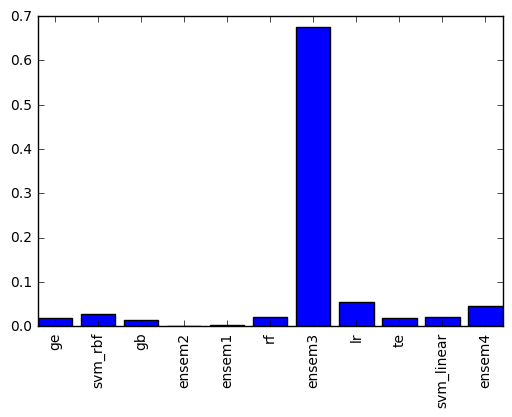

In [116]:
data=pd.read_csv('cisc5352.project.1.option_data.csv')
kernellist=['rbf','linear']
ncol=len(data)
sample=[] #random numbers list
for i in range(2000):
    sample.append(random.randint(0,ncol))
data_2000=data.ix[sample,:]
datax=data_2000.ix[:,0:7]
datay=data_2000.ix[:,7]
 
test_percent=0.2
training_data, test_data, training_data_response, test_data_response = train_test_split(datax, datay, test_size=test_percent,random_state=42)

#Euclidean distance, general_knn
general_kNN = KNeighborsRegressor(n_neighbors=3, weights='distance', algorithm='auto', metric='euclidean')
general_kNN.fit(training_data, training_data_response)
predict_ge=general_kNN.predict(test_data)
print("The predicted response for test data within general k-NN method, and Enclidean distance weights is:\n")
print(predict_ge)

#Euclidean distance, kdtree_knn
kdtree_kNN = KNeighborsRegressor(n_neighbors=3, weights='distance', algorithm='kd_tree', metric='euclidean')
kdtree_kNN.fit(training_data, training_data_response)
predict_te=kdtree_kNN.predict(test_data)
print("The predicted response for test data within kd-tree k-NN method, and Enclidean distance weights is:\n")
print(predict_te)


#accuracy
n_predict=len(test_data_response)
MSE_ge=(1/n_predict)*(sum(pow((predict_ge-test_data_response),2)))
MSE_te=1/n_predict*sum(pow(predict_te-test_data_response,2))

#svm
svm_learning_machine_rbf=svm.SVR(kernel='rbf')
svm_learning_machine_rbf.fit(training_data,training_data_response)

svm_learning_machine_linear=svm.SVR(kernel='linear')
svm_learning_machine_linear.fit(training_data,training_data_response)


#svm_learning_machine_poly=svm.SVR(kernel='poly')
#svm_learning_machine_poly.fit(training_data,training_data_response)

#svm_learning_machine_sigmoid=svm.SVR(kernel='sigmoid')
#svm_learning_machine_sigmoid.fit(training_data,training_data_response)

svm_predict_rbf=svm_learning_machine_rbf.predict(test_data)
svm_predict_linear=svm_learning_machine_linear.predict(test_data)
#svm_predict_poly=svm_learning_machine_poly.predict(test_data)
#svm_predict_sigmoid=svm_learning_machine_sigmoid.predict(test_data)

print("\n the result with rbf kernel" )
print(svm_predict_rbf)
print("\n the result with linear kernel" )
print(svm_predict_linear)
print("\n the result with poly kernel" )
#print(svm_predict_poly)
print("\n the result with sigmoid kernel" )
#print(svm_predict_sigmoid)


#accuracy
n_predict=len(svm_predict_rbf)
MSE_svm_rbf=1/n_predict*sum(np.power(svm_predict_rbf-test_data_response,2))
MSE_svm_linear=1/n_predict*sum(np.power(svm_predict_linear-test_data_response,2))

#Random Forest
params1={'n_estimators':20 ,'min_samples_split':2}
rf=ensemble.GradientBoostingRegressor(**params1)
rf.fit(training_data,training_data_response)
rf_predict=rf.predict(test_data)
print('random forest')
print(rf_predict)
#accuracy
n_predict=len(svm_predict_rbf)
MSE_rf=1/n_predict*sum(np.power(rf_predict-test_data_response,2))


#Gradient Boosting
params2={'n_estimators': 1000, 'max_depth':6, 'min_samples_split':2, 'learning_rate':0.01, 'loss':'ls'}
gb= ensemble.GradientBoostingRegressor(**params2)
gb.fit(training_data,training_data_response)
gb_predict=gb.predict(test_data)
print('gradient boosting')
print(gb_predict)

#accuracy
n_predict=len(svm_predict_rbf)
MSE_gb=1/n_predict*sum(np.power(gb_predict-test_data_response,2))


n_predict=len(svm_predict_rbf)
mse_1=MSE_ge
mse_2=MSE_te
mse_3=MSE_svm_rbf
mse_4=MSE_svm_linear
mse_5=MSE_rf
mse_6=MSE_gb


#ensemble 1
ensemble1_predict=(predict_ge+predict_te+svm_predict_rbf+svm_predict_linear+rf_predict+gb_predict)/6
print(ensemble1_predict)

#ensemble 2
ensemble2_predict=list()
for i in range(400):
    s=statistics.median([predict_ge[i],predict_te[i],svm_predict_rbf[i],+svm_predict_linear[i],+rf_predict[i],gb_predict[i]])
    ensemble2_predict.append(s)
print(ensemble2_predict)


#ensemble 3
w_1=1-mse_1/(mse_1+mse_2+mse_3+mse_4+mse_5+mse_6)
w_2=1-mse_2/(mse_1+mse_2+mse_3+mse_4+mse_5+mse_6)
w_3=1-mse_3/(mse_1+mse_2+mse_3+mse_4+mse_5+mse_6)
w_4=1-mse_4/(mse_1+mse_2+mse_3+mse_4+mse_5+mse_6)
w_5=1-mse_5/(mse_1+mse_2+mse_3+mse_4+mse_5+mse_6)
w_6=1-mse_6/(mse_1+mse_2+mse_3+mse_4+mse_5+mse_6)
ensemble3_predict=predict_ge*w_1+predict_te*w_2+svm_predict_rbf*w_3+svm_predict_linear*w_4+rf_predict*w_5+gb_predict*w_6
#print(ensemble3_predict)

#ensemble 4
w_1_new=1-w_1
w_2_new=1-w_2
w_3_new=1-w_3
w_4_new=1-w_4
w_5_new=1-w_5
w_6_new=1-w_6
ensemble4_predict=predict_ge*w_1_new+predict_te*w_2_new+svm_predict_rbf*w_3_new+svm_predict_linear*w_4_new+rf_predict*w_5_new+gb_predict*w_6_new
#print(ensemble4_predict)


training_data = np.asarray(training_data, dtype="S32")
training_data_response = np.asarray(training_data_response, dtype="S32")
lr_learning_machine=linear_model.LogisticRegression()
lr_learning_machine.fit(training_data,training_data_response)
lr_predict=lr_learning_machine.predict(test_data)
lr_predict = np.asarray(lr_predict, dtype="float64")
MSE_lr=(1/n_predict)*(sum(pow((lr_predict-test_data_response),2)))

MSE_dict= {'ge':MSE_ge,'te':MSE_te,
'svm_rbf':MSE_svm_rbf,'svm_linear':MSE_svm_linear,
'rf':MSE_rf,
'gb':MSE_gb,
'ensem1':MSE_ensemble1,
'ensem2':MSE_ensemble2,
'ensem3':MSE_ensemble3,
'ensem4':MSE_ensemble4,
'lr':MSE_lr
}
plt.bar(range(len(MSE_dict)), MSE_dict.values(), align='center',color = 'red')
plt.xticks(range(len(MSE_dict)), MSE_dict.keys(),rotation = 'vertical')
plt.plot()

[]

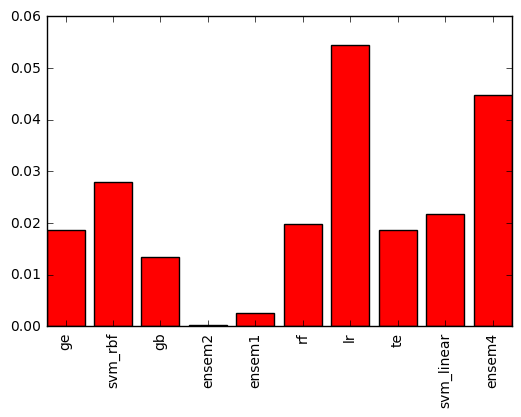

In [117]:
MSE_dict= {'ge':MSE_ge,'te':MSE_te,
'svm_rbf':MSE_svm_rbf,'svm_linear':MSE_svm_linear,
'rf':MSE_rf,
'gb':MSE_gb,
'ensem1':MSE_ensemble1,
'ensem2':MSE_ensemble2,
'ensem4':MSE_ensemble4,
'lr':MSE_lr
}
plt.bar(range(len(MSE_dict)), MSE_dict.values(), align='center',color = 'red')
plt.xticks(range(len(MSE_dict)), MSE_dict.keys(),rotation = 'vertical')
plt.plot()

# Conclusion

Polarized ensebmle performance: the second ensemble method turned out to be the best while the third was aweful

logistic regression and support vector machine performed unstably cross different datasets

Random Forest and gradient boost had consistanly decent performance 